In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\claimants.csv")

In [3]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [5]:
df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [6]:
df.drop('CASENUM',axis=1,inplace=True)

<Axes: xlabel='ATTORNEY', ylabel='CLMAGE'>

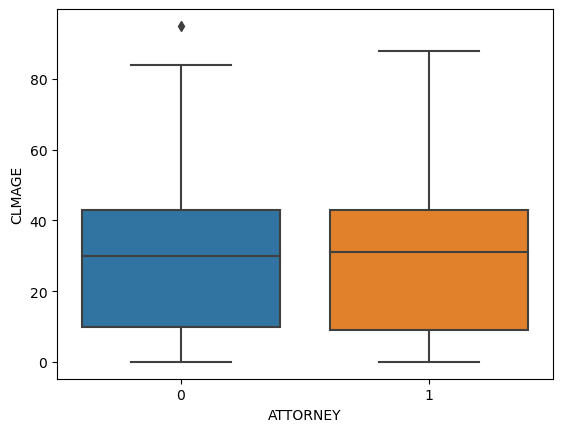

In [8]:
sns.boxplot(x='ATTORNEY',y='CLMAGE',data=df)

In [9]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
clm=df['CLMSEX'].mode()[0]

In [11]:
df['CLMSEX'].fillna(clm,inplace=True)

In [12]:
df.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [13]:
clmi=df['CLMINSUR'].mode()[0]

In [14]:
df['CLMINSUR'].fillna(clmi,inplace=True)

In [15]:
df.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [16]:
seat=df['SEATBELT'].mode()[0]

In [17]:
df['SEATBELT'].fillna(seat,inplace=True)

In [18]:
df.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [19]:
cage=df['CLMAGE'].mode()[0]

In [20]:
df['CLMAGE'].fillna(cage,inplace=True)

In [21]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

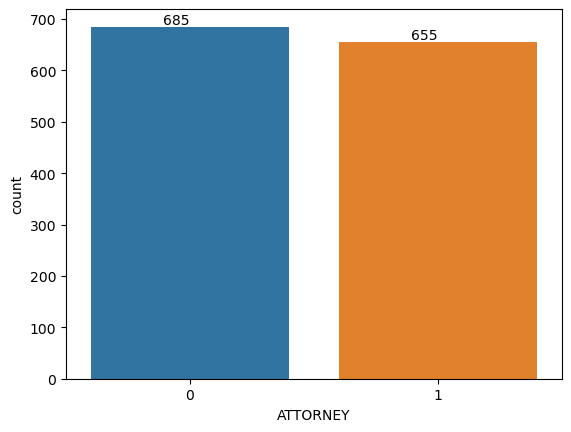

In [22]:
sns.countplot(x='ATTORNEY',data=df)
counts = df['ATTORNEY'].value_counts()

# Add count values on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='right', va='bottom')

<Axes: xlabel='ATTORNEY'>

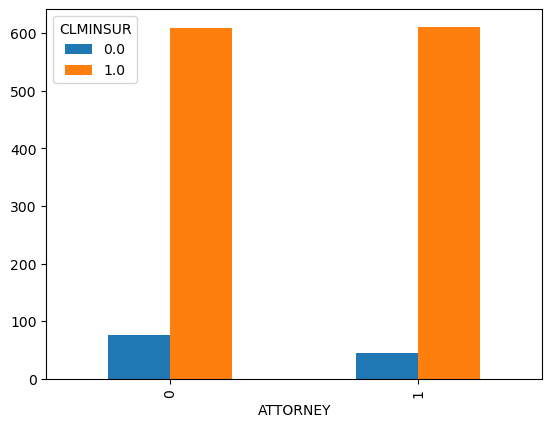

In [23]:
pd.crosstab(df['ATTORNEY'],df['CLMINSUR']).plot(kind='bar')

<Axes: xlabel='SEATBELT', ylabel='count'>

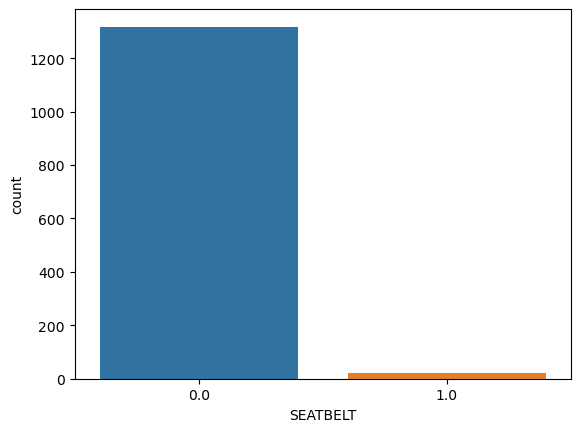

In [24]:
sns.countplot(x=df['SEATBELT'],data=df)

<Axes: xlabel='ATTORNEY'>

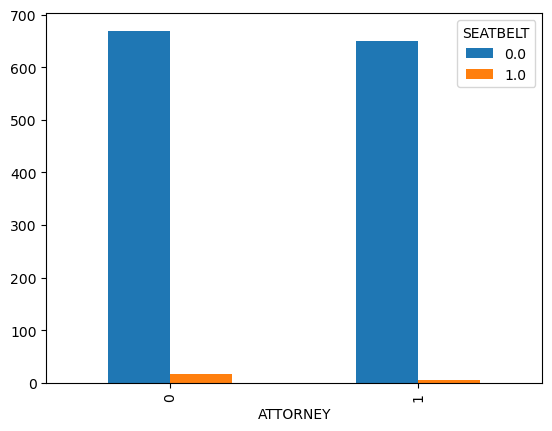

In [25]:
pd.crosstab(df['ATTORNEY'],df['SEATBELT']).plot(kind='bar')

<Axes: xlabel='ATTORNEY'>

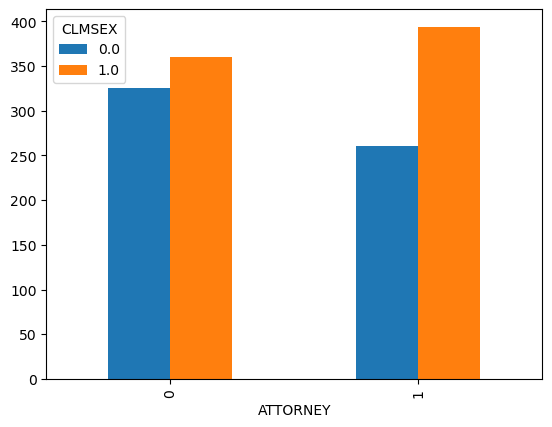

In [26]:
pd.crosstab(df['ATTORNEY'],df['CLMSEX']).plot(kind='bar')

In [27]:
pd.crosstab(df['ATTORNEY'],df['CLMSEX'])

CLMSEX,0.0,1.0
ATTORNEY,,
0,325,360
1,261,394


In [28]:
df.groupby('ATTORNEY').count()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,,,,,
0,685,685,685,685,685
1,655,655,655,655,655


In [29]:
target=df['ATTORNEY']

In [30]:
feature=df.iloc[:,1:]

In [31]:
feature

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [33]:
features=df.drop('ATTORNEY',axis=1)

In [34]:
model=LogisticRegression()
model.fit(features,target)

LogisticRegression()

In [35]:
model.coef_

array([[ 0.31177852,  0.51841505, -0.54516356,  0.00377136, -0.32004956]])

In [50]:
model.predict_proba(features)

array([[9.99973280e-01, 2.67203675e-05],
       [4.90003954e-01, 5.09996046e-01],
       [4.06815395e-01, 5.93184605e-01],
       ...,
       [2.90886512e-01, 7.09113488e-01],
       [6.74664238e-01, 3.25335762e-01],
       [3.38803462e-01, 6.61196538e-01]])

In [51]:
predt=model.predict(features)

In [52]:
print(classification_report(target,predt))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.70      0.70      1340
weighted avg       0.71      0.70      0.70      1340



<Axes: >

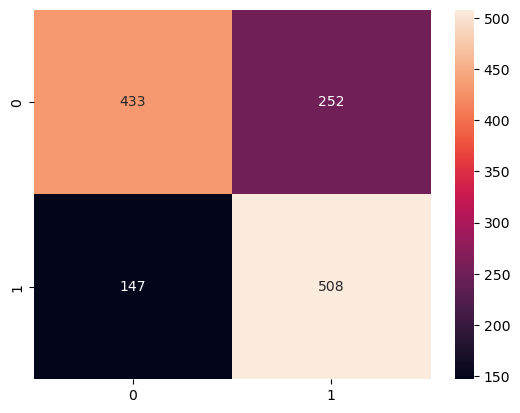

In [53]:
sns.heatmap(confusion_matrix(target,predt),annot=True,fmt='g')

In [54]:
from sklearn.metrics import roc_auc_score,roc_curve

In [55]:
roc_score=roc_auc_score(target,predt)

In [56]:
fpr,tpr,threshold=roc_curve(target,predt)

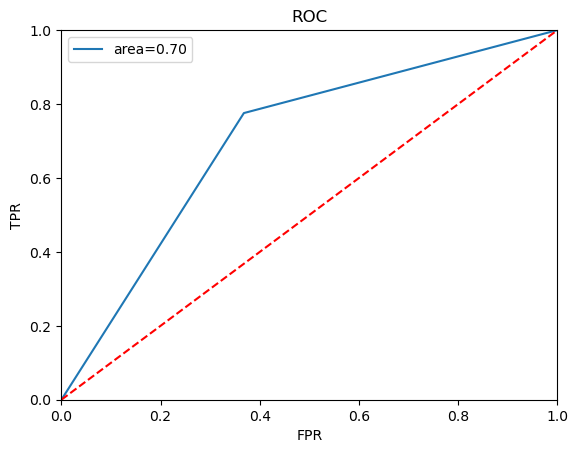

In [57]:
plt.plot(fpr,tpr,label='area=%0.2f'%roc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC')
plt.legend(loc='best')

## Logistic Regression using Statsmodel

In [58]:
import statsmodels.api as sm

In [59]:
model1=sm.Logit(target,features).fit()

Optimization terminated successfully.
         Current function value: 0.610191
         Iterations 7


In [60]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                            4
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.1194
Time:                        19:25:00   Log-Likelihood:                -817.66
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 8.268e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.3051      0.116      2.633      0.008       0.078       0.532
CLMINSUR       0.4840      0.118      4.098      0.000       0.253       0.716
SEATBELT      -0.6973      0.523     -1.334      0.182      -1.722       0.327
CLMAGE         0.0035      0.003      1.195      0.232      -0.002       0.009
LOSS          -0.3222      0.029    -11.116      0.000      -0.379      -0.265
==============================================================================
"""

here seatbelt and clmage is having p vale greater than 0.05 

In [61]:
 from sklearn.metrics import accuracy_score
import numpy as np

In [62]:
# Set the length of the list you want
list_length = 500

# Generate a list of continuous random values from 0 to 1
random_values = np.random.rand(list_length)

print(random_values)

[0.918696   0.85311835 0.05422877 0.63282435 0.68769318 0.80601538
 0.22864092 0.53249074 0.69109665 0.88757653 0.71420933 0.18895909
 0.29913209 0.40927867 0.02746797 0.81902014 0.70940084 0.85271008
 0.50168304 0.97201629 0.69523547 0.48607663 0.91528126 0.55521222
 0.1871353  0.13899694 0.6444666  0.73719939 0.11233051 0.49456851
 0.69516608 0.02150429 0.79986305 0.40930905 0.33625709 0.73375147
 0.33834338 0.47738973 0.35693874 0.35514872 0.76061459 0.1564647
 0.99531157 0.47252655 0.89846184 0.30506017 0.17716529 0.5974586
 0.46318808 0.11712595 0.09648317 0.4276014  0.14928808 0.62445436
 0.88679105 0.6490653  0.4127968  0.83146835 0.21988849 0.06788988
 0.76657088 0.87060448 0.16787324 0.14362083 0.50804106 0.73702205
 0.31757934 0.98541056 0.30602825 0.64967805 0.00382908 0.06642651
 0.35589374 0.76632964 0.52132995 0.85034563 0.12174596 0.73825826
 0.93919765 0.389316   0.89576281 0.40341832 0.95375106 0.22644798
 0.34150344 0.67962748 0.22336858 0.98701654 0.96764631 0.850581

In [63]:
threshold=random_values

In [64]:
accuracy_ls=[]
for i in threshold:
    y_predt2=np.where(model.predict_proba(features)[:,1]>i,1,0)
    accuracy_ls.append(accuracy_score(target,y_predt2,normalize=True))
accuracy_ls=pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['threshold','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls

,threshold,accuracy
347,0.550156,0.712687
166,0.548527,0.711194
442,0.548434,0.711194
244,0.536343,0.711194
477,0.521511,0.710448
...,...,...
169,0.881377,0.511194
390,0.977582,0.511194
391,0.823961,0.511194
161,0.780793,0.511194


In [70]:
best_thres=0.550156

In [71]:
preds=np.where(model.predict_proba(features)[:,1]>best_thres,1,0)
print(classification_report(target,preds))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       685
           1       0.70      0.73      0.71       655

    accuracy                           0.71      1340
   macro avg       0.71      0.71      0.71      1340
weighted avg       0.71      0.71      0.71      1340

